![alt text](data/cover.jpg "Title")

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; 
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sklm
from sklearn.decomposition import PCA
from statistics import mean
from sklearn.metrics import accuracy_score

In [58]:
train = pd.read_csv("data/train_clean.csv", sep=',')
test = pd.read_csv("data/test_clean.csv", sep =',')

## Regression Logistique : Selection des Variables Explicatives

In [59]:
y = train.pop("Survived")
X = train
X = pd.get_dummies(X)

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Creation du modèle en selectionnant les données avec Kbest

In [61]:
def modeleaveckbest():
    accuracy =[]
    for i in range(1,100):
        selector = SelectKBest(chi2, k=5)
        selector.fit(X, y)
        X_new = selector.transform(X)
        Xtrain, Xtest , ytrain, ytest = train_test_split(X_new,y , train_size=0.8)
        reg_log = LogisticRegression(solver = 'lbfgs')
        reg_log.fit(Xtrain, ytrain)
        y_pred = reg_log.predict(Xtest)
        accuracy.append(accuracy_score(ytest, y_pred))
    print(mean(accuracy))

### Creation du modèle en selectionnant les données avec une ACP

In [66]:
def modeleavecpca():
    accuracy =[]
    for i in range(1,100):
        pca = PCA(n_components=7)
        X_new = pca.fit_transform(X, y)
        Xtrain, Xtest , ytrain, ytest = train_test_split(X_new,y , train_size=0.7)
        reg_log = LogisticRegression(solver = 'lbfgs')
        reg_log.fit(Xtrain, ytrain)
        y_pred = reg_log.predict(Xtest)
        accuracy.append(accuracy_score(ytest, y_pred))
    print(mean(accuracy))

In [67]:
import warnings
warnings.filterwarnings('ignore')
modeleaveckbest()
modeleavecpca()

0.7852265673494724
0.7964344941956882


## Evaluation du modèle

In [68]:
#affichage de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(y, reg_log.predict(X_new)), columns=['prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm

,prédit 0,prédit 1
vrai 0,490,59
vrai 1,144,198


In [69]:
warnings.filterwarnings(action='once')
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred)) # le plus important pour le moment; précisément la première ligne

from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       166
           1       0.77      0.55      0.64       102

    accuracy                           0.76       268
   macro avg       0.77      0.72      0.73       268
weighted avg       0.77      0.76      0.75       268

0.7649253731343284
[[149  17]
 [ 46  56]]


### Courbe ROC et AUC

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reg_log.predict_proba(X_new)
fpr0, tpr0, thresholds0 = roc_curve(y, proba[:, 0], pos_label=reg_log.classes_[0], drop_intermediate=False)

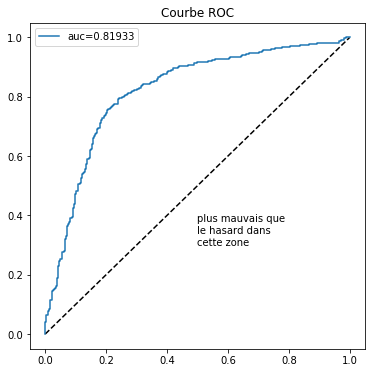

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

## On peut en conclure d'apres la valeur de précision du modele ( 0.79 ), et de sa valeurs AUC ( 0.84 ) Que ce modele prédit correctement la survie des passagers de ce bateau ! 
#### avec une précision de 79% ? 

### Je fais tourner mon modele avec les valeurs de train et de test mis a dispositions par kaggle 
#### Et j'enregistre mon résultat au format csv comme demandée

In [73]:
train = pd.read_csv("data/train_clean.csv", sep=',')
test = pd.read_csv("data/test_clean.csv", sep =',')

In [74]:
ytrain = train.pop("Survived")
Xtrain = train
Xtrain = pd.get_dummies(Xtrain)
Xtest = test
Xtest = pd.get_dummies(Xtest)

In [75]:
def modeleavecPCAplus(X,y,Xtest):
    accuracy =[]
    for i in range(1,100):
        pca = PCA(n_components=7)
        X_new = pca.fit_transform(X, y)
        reg_log = LogisticRegression(solver = 'lbfgs')
        reg_log.fit(X, y)
        y_pred = reg_log.predict(Xtest)
    res = pd.concat([Xtest['PassengerId'], pd.DataFrame(y_pred, columns=['Survived'])],axis=1)
    return res

In [76]:
res = modeleavecPCAplus(Xtrain,ytrain,Xtest)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


In [77]:
res.to_csv('data/reponsekaggle.csv',index=False)

### Test d'odds ratio

In [78]:
accuracy =[]
for i in range(1,100):
    selector = SelectKBest(chi2, k=5)
    selector.fit(X, y)
    X_new = selector.transform(X)
    Xtrain, Xtest , ytrain, ytest = train_test_split(X_new,y , train_size=0.8)
    reg_log = LogisticRegression(solver = 'lbfgs')
    reg_log.fit(Xtrain, ytrain)
    y_pred = reg_log.predict(Xtest)
    accuracy.append(accuracy_score(ytest, y_pred))
print("Accuracy : ",mean(accuracy))

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy :  0.7833643699565487


In [79]:
X.columns[selector.get_support(indices=True)].tolist()

['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male']

In [90]:
coef = pd.DataFrame(np.concatenate([reg_log.intercept_.reshape(-1,1), reg_log.coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X.columns[selector.get_support(indices=True)].tolist())).T

# Calcul de l'exponentiel pour avoir les odds-ratio
coef["OR"] = np.exp(coef.Coefficients)

In [91]:
coef

,Coefficients,OR
constante,2.992123,19.927947
Pclass,-1.047716,0.350738
Age,-0.029683,0.970753
Fare,0.001965,1.001967
Sex_female,1.248394,3.484743
Sex_male,-1.248388,0.286967


#### Une femme à (1/3.74) fois plus de chance de survivre
#### si on augment l'age d'un an alors la probabilité de survie augmente de (0.97 -1)